In this assessment, you'll continue working on the MNIST dataset. So, train and test the models specified in the tasks below using the MNIST data. You can choose the number of epochs for training. But for the sake of comparison, it's a good idea to train for 20 epochs.

To complete this assessment, create a Jupyter Notebook containing your solutions to the following tasks:

In this task, you'll implement several ANN models with different batch sizes. Specifically, do the following:

Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 8 as the mini-batch size.
Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 128 as the mini-batch size.
Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the full sample as the batch size.
Compare the results of each model. Which batch size performed best?

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [4]:
X_train[0].shape

(784,)

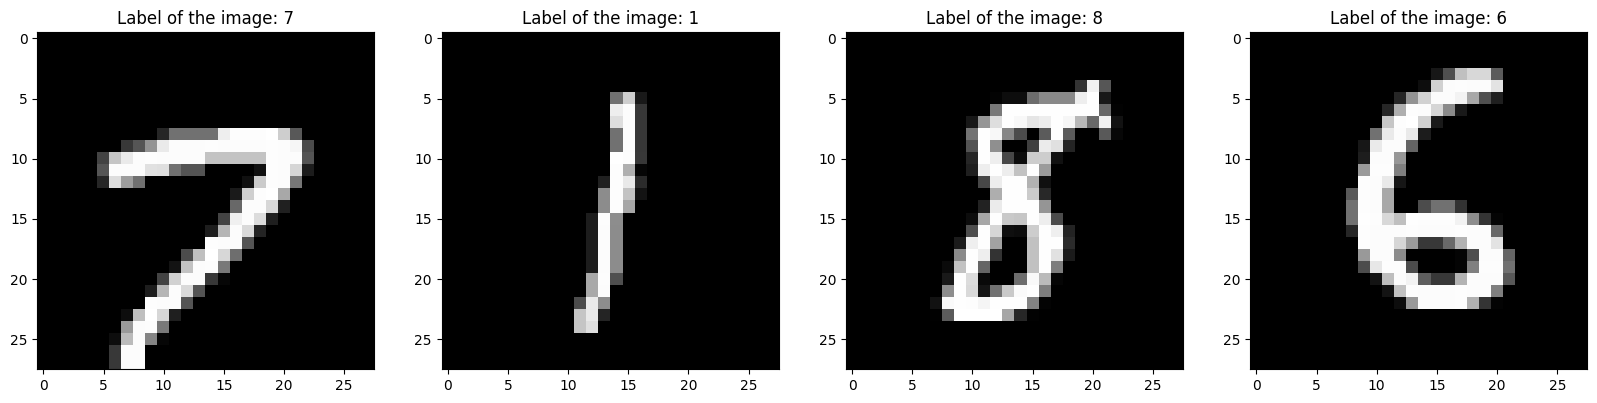

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 8

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.3627 - accuracy: 0.8964
Epoch 2/20
7500/7500 [==============================] - 11s 2ms/step - loss: 0.1676 - accuracy: 0.9512
Epoch 3/20
7500/7500 [==============================] - 10s 1ms/step - los

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 128

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2800 - accuracy: 0.6663
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.8659
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.38

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = X_train.shape[0]

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 2.2966 - accuracy: 0.1511
Epoch 2/20
1/1 [==============================] - 0s 443ms/step - loss: 2.2893 - accuracy: 0.1564
Epoch 3/20
1/1 [==============================] - 0s 422ms/step - loss: 2.2822 - accu

In this task, you'll implement several ANN models with different learning rates for the stochastic gradient descent. In all of the models below, use 128 as your mini-batch size.

Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 0.01 as the learning rate.
Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 100 as the learning rate.
Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 0.0000001 as the learning rate.
Compare the results of each model. Which learning rate performed best?

In [16]:
from tensorflow.keras import optimizers
sgd_001 = optimizers.SGD(lr=0.01)
sgd_100 = optimizers.SGD(lr=100)
sgd_00000001 = optimizers.SGD(lr=0.0000001)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 128

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=sgd_001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.2853 - accuracy: 0.6726
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5105 - accuracy: 0.8658
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.39

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 128

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=sgd_100, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.1901 - accuracy: 0.6992
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4951 - accuracy: 0.8699
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.38

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 128

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=sgd_001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 1.2026 - accuracy: 0.7034
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.8745
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.37

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dense
from keras import backend as K
from tensorflow.keras import losses

batch_size = 128

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation='relu'))
# The second dense layer
model.add(Dense(64, activation='relu'))
# The last layer is the output layer
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=sgd_00000001, loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


KeyError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_24/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.SGD.'


The model converged when using 0.01 as the learning rate. However, it diverged when using 100, because that value deemed to be too large. Using 0.0000001 as the learning rate causes the model to improve very slowly. Hence the accuracy improved very little. So, it deemed to be too low.

sample solution:
https://colab.research.google.com/drive/1Tux1Bb6FV_8_DfoqKztiTbhevdphoUzh#scrollTo=bODT_kzYs5uA